In [0]:
#Analysis of Gross of a Movie vs Directors
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
movies = pd.read_csv('/Workspace/Users/dtataev@cmhc-schl.gc.ca/IMDB/imdb_top_1000.csv')
movies.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


              Director         Gross
470   Steven Spielberg  2.478133e+09
36       Anthony Russo  2.205039e+09
83   Christopher Nolan  1.937454e+09
202      James Cameron  1.748237e+09
383      Peter Jackson  1.597312e+09
195        J.J. Abrams  1.423171e+09
58           Brad Bird  1.099628e+09
426    Robert Zemeckis  1.049446e+09
107        David Yates  9.789537e+08
380        Pete Docter  9.393821e+08


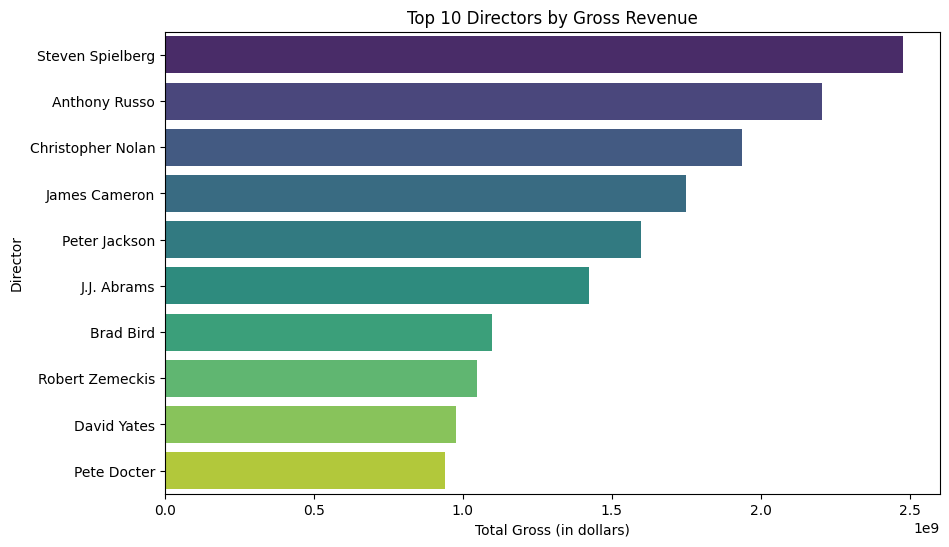

In [0]:
# Convert Gross column to numeric (removing commas if necessary)
movies['Gross'] = movies['Gross'].str.replace(',', '')
movies['Gross'] = pd.to_numeric(movies['Gross'], errors='coerce')

# Group by Director and sum the gross revenue
director_gross = movies.groupby('Director')['Gross'].sum().reset_index()

# Sort by total gross in descending order
director_gross = director_gross.sort_values(by='Gross', ascending=False)

# Display the top 10 directors by gross revenue
print(director_gross.head(10))

# Plot the top 10 directors by gross revenue
plt.figure(figsize=(10,6))
sns.barplot(x='Gross', y='Director', data=director_gross.head(10), palette='viridis')
plt.title('Top 10 Directors by Gross Revenue')
plt.xlabel('Total Gross (in dollars)')
plt.ylabel('Director')
plt.show()

                  Actor   Genre  Movie_Count
6524     Robert De Niro   Drama           17
107           Al Pacino   Drama           13
861           Brad Pitt   Drama            9
4688  Leonardo DiCaprio   Drama            9
7666          Tom Hanks   Drama            9
1779  Denzel Washington   Drama            9
2228        Ethan Hawke   Drama            9
1346     Christian Bale   Drama            9
3944        Johnny Depp   Drama            8
2829      Harrison Ford  Action            8


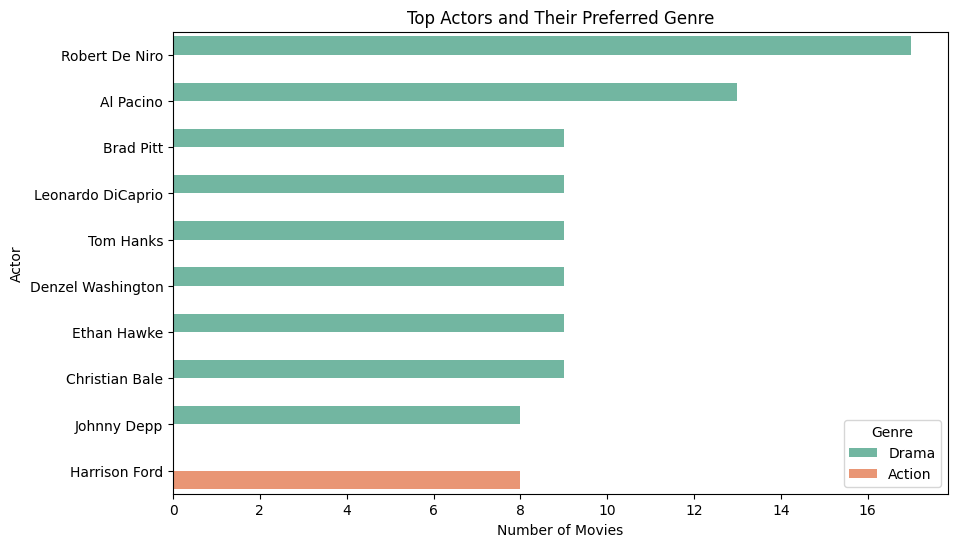

In [0]:
#Which Actor Prefers Which Genre More?
# Split the Genre column into multiple genres
movies['Genre'] = movies['Genre'].str.split(', ')

# Explode the genres into individual rows
movies_genres = movies.explode('Genre')

# Create a list of all actors (Star1, Star2, Star3, Star4)
actors_columns = ['Star1', 'Star2', 'Star3', 'Star4']
actors = pd.melt(movies_genres, id_vars=['Series_Title', 'Genre'], value_vars=actors_columns, var_name='Star_Position', value_name='Actor')

# Group by Actor and Genre, and count the number of appearances in each genre
actor_genre_count = actors.groupby(['Actor', 'Genre']).size().reset_index(name='Movie_Count')

# Find the preferred genre for each actor (i.e., the genre with the most movies)
preferred_genre = actor_genre_count.loc[actor_genre_count.groupby('Actor')['Movie_Count'].idxmax()]

# Display the preferred genre for the top 10 actors (by total movie count)
top_actors = preferred_genre.sort_values(by='Movie_Count', ascending=False).head(10)
print(top_actors)

# Plot the preferred genre for top 10 actors
plt.figure(figsize=(10,6))
sns.barplot(x='Movie_Count', y='Actor', hue='Genre', data=top_actors, palette='Set2')
plt.title('Top Actors and Their Preferred Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()


                                     Actor_Combination        Gross
221  Daisy Ridley, John Boyega, Oscar Isaac, Domhna...  936662225.0
492  Joe Russo, Robert Downey Jr., Chris Evans, Mar...  858373000.0
822  Sam Worthington, Zoe Saldana, Sigourney Weaver...  760507625.0
237  Daniel Radcliffe, Emma Watson, Rupert Grint, M...  682970416.0
493  Joe Russo, Robert Downey Jr., Chris Hemsworth,...  678815482.0
594  Leonardo DiCaprio, Kate Winslet, Billy Zane, K...  659325379.0
782  Robert Downey Jr., Chris Evans, Scarlett Johan...  623279547.0
218  Craig T. Nelson, Holly Hunter, Sarah Vowell, H...  608581744.0
634  Mark Hamill, Harrison Ford, Carrie Fisher, Bil...  599600476.0
190  Christian Bale, Heath Ledger, Aaron Eckhart, M...  534858444.0


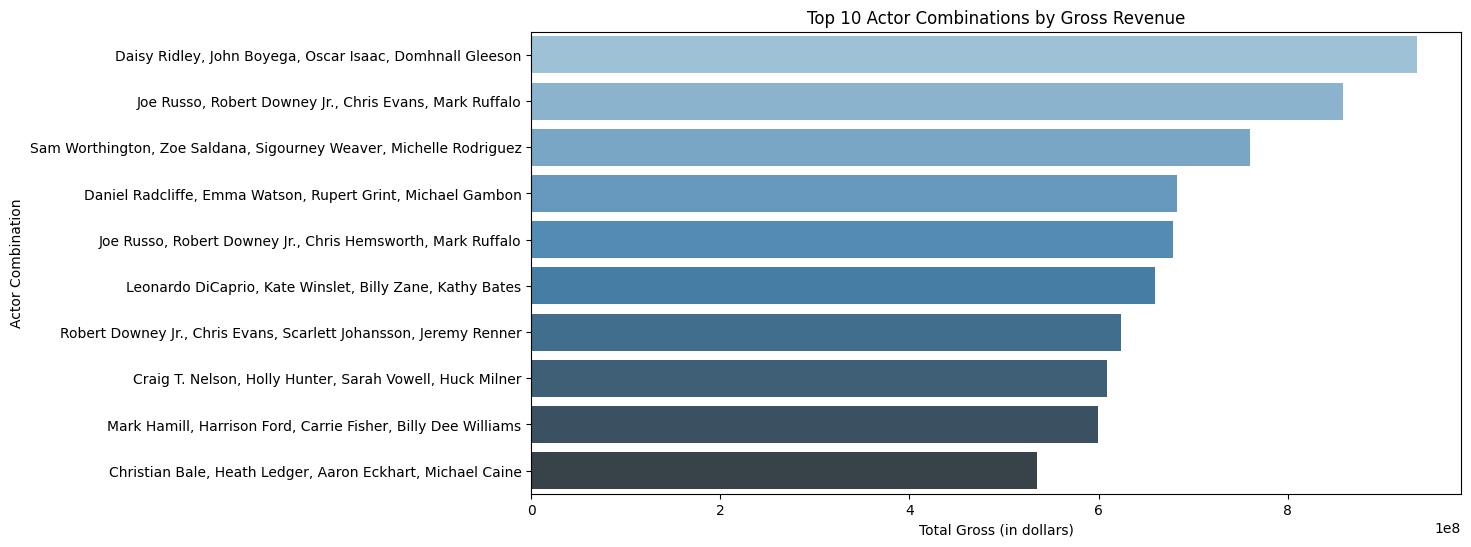

In [0]:
# Create a column for the combination of all four stars
movies['Actor_Combination'] = movies['Star1'] + ', ' + movies['Star2'] + ', ' + movies['Star3'] + ', ' + movies['Star4']

# Group by Actor_Combination and sum the gross revenue
actor_combination_gross = movies.groupby('Actor_Combination')['Gross'].sum().reset_index()

# Sort by total gross in descending order
actor_combination_gross = actor_combination_gross.sort_values(by='Gross', ascending=False)

# Display the top 10 actor combinations by gross revenue
print(actor_combination_gross.head(10))

# Plot the top 10 actor combinations by gross revenue
plt.figure(figsize=(12,6))
sns.barplot(x='Gross', y='Actor_Combination', data=actor_combination_gross.head(10), palette='Blues_d')
plt.title('Top 10 Actor Combinations by Gross Revenue')
plt.xlabel('Total Gross (in dollars)')
plt.ylabel('Actor Combination')
plt.show()


In [0]:
#Genres with the Highest Average Rating
# Split the genres column into multiple rows
movies_genres = movies.copy()
movies_genres['genres'] = movies_genres['genres'].str.split('|')
movies_genres = movies_genres.explode('genres')

# Merge with ratings and calculate the average rating for each genre
genres_ratings = pd.merge(movies_genres, ratings, on='movieId')
avg_genre_rating = genres_ratings.groupby('genres')['rating'].mean().sort_values(ascending=False)

# Plot the average rating for each genre
plt.figure(figsize=(10,6))
avg_genre_rating.plot(kind='barh', color='coral')
plt.title('Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()
